<a href="https://colab.research.google.com/github/qinliuliuqin/OOD/blob/main/activemri_r21_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training and testing settings
There are three training settings: \\
Setting 0: 100% ID \\
Setting 1: 70% ID, 30% OOD \\
Setting 2: 100% OOD

Test set: 100% ID or 100% OOD

# Test results on ID

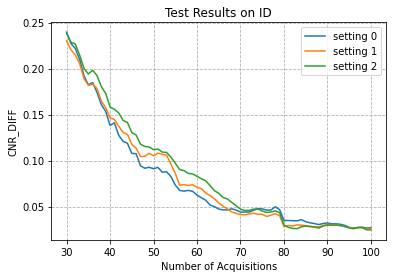

In [ ]:
data_folder='/content/drive/MyDrive/MR_Recon/R21_figures'

policy='random'
metric='cnr'
scores_id_setting_0_npy = os.path.join(data_folder, 'model_1220_2021_cnr/{}_id/scores.npy'.format(policy))
scores_id_setting_1_npy = os.path.join(data_folder, 'model_0109_2022/{}_id/scores.npy'.format(policy))
scores_id_setting_2_npy = os.path.join(data_folder, 'model_0110_2022/{}_id/scores.npy'.format(policy))

scores_id_setting_0 = np.load(scores_id_setting_0_npy, allow_pickle=True).item()[metric]
scores_id_setting_1 = np.load(scores_id_setting_1_npy, allow_pickle=True).item()[metric]
scores_id_setting_2 = np.load(scores_id_setting_2_npy, allow_pickle=True).item()[metric]

scores_id_setting_0_mean = np.mean(scores_id_setting_0, axis=0)
num_scans_id_setting_0 = range(30, 30+len(scores_id_setting_0_mean))

scores_id_setting_1_mean = np.mean(scores_id_setting_1, axis=0)
num_scans_id_setting_1 = range(30, 30+len(scores_id_setting_1_mean))

scores_id_setting_2_mean = np.mean(scores_id_setting_2, axis=0)
num_scans_id_setting_2 = range(30, 30+len(scores_id_setting_2_mean))

plt.plot(num_scans_id_setting_0, scores_id_setting_0_mean, label='setting 0')
plt.plot(num_scans_id_setting_1, scores_id_setting_1_mean, label='setting 1')
plt.plot(num_scans_id_setting_2, scores_id_setting_2_mean, label='setting 2')

plt.title('Test Results on ID')
plt.xlabel('Number of Acquisitions')
plt.ylabel('CNR_DIFF')

plt.grid(linestyle='--')
plt.legend()
plt.show()

# Test results on OOD

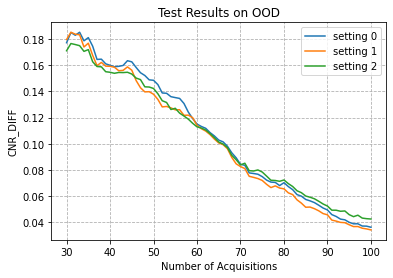

In [ ]:
data_folder='/content/drive/MyDrive/MR_Recon/R21_figures'

policy='random'
metric='cnr'
scores_ood_setting_0_npy = os.path.join(data_folder, 'model_1220_2021_cnr/{}_ood/scores.npy'.format(policy))
scores_ood_setting_1_npy = os.path.join(data_folder, 'model_0109_2022/{}_ood/scores.npy'.format(policy))
scores_ood_setting_2_npy = os.path.join(data_folder, 'model_0110_2022/{}_ood/scores.npy'.format(policy))

scores_ood_setting_0 = np.load(scores_ood_setting_0_npy, allow_pickle=True).item()[metric]
scores_ood_setting_1 = np.load(scores_ood_setting_1_npy, allow_pickle=True).item()[metric]
scores_ood_setting_2 = np.load(scores_ood_setting_2_npy, allow_pickle=True).item()[metric]

scores_ood_setting_0_mean = np.mean(scores_ood_setting_0, axis=0)
num_scans_ood_setting_0 = range(30, 30+len(scores_ood_setting_0_mean))

scores_ood_setting_1_mean = np.mean(scores_ood_setting_1, axis=0)
num_scans_ood_setting_1 = range(30, 30+len(scores_ood_setting_1_mean))

scores_ood_setting_2_mean = np.mean(scores_ood_setting_2, axis=0)
num_scans_ood_setting_2 = range(30, 30+len(scores_ood_setting_2_mean))

plt.plot(num_scans_ood_setting_0, scores_ood_setting_0_mean, label='setting 0')
plt.plot(num_scans_ood_setting_1, scores_ood_setting_1_mean, label='setting 1')
plt.plot(num_scans_ood_setting_2, scores_ood_setting_2_mean, label='setting 2')

plt.title('Test Results on OOD')
plt.xlabel('Number of Acquisitions')
plt.ylabel('CNR_DIFF')

plt.grid(linestyle='--')
plt.legend()
plt.show()

# CNR diff for small/intermediate sized lesions

In [ ]:
# TBD

# Downstream Task: Lesion Segmentation
*   Segmentation codebase: https://github.com/qinliuliuqin/Medical-Segmentation3d-Toolkit
*   Segmentation model is trained on 800 lesion data (fully-observed).
*   Reconstructor training settings:
 *   Setting 0: reconstructor trained on 100% normal data
 *   Setting 1: reconstructor trained on 50% normal data, 50% lesion data
 *   Setting 2: reconstructor trained on 100% lesion data
*   Acquisition policy: random 




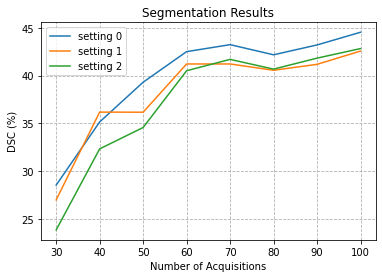

In [ ]:
# Image name: sub-NDARINV2T5K2NDJ
# Image size: 160 x 256 x 256
# Num acquisitions: 70 (starting from 30)
num_acquisitions = [30 + i*10 for i in range(8)]
DSC_setting_0 = [28.54, 35.15, 39.31, 42.51, 43.24, 42.18, 43.21, 44.54]
DSC_setting_1 = [26.99, 36.18, 36.17, 41.22, 41.22, 40.56, 41.18, 42.57]
DSC_setting_2 = [23.85, 32.33, 34.57, 40.51, 41.70, 40.68, 41.83, 42.83]
plt.plot(num_acquisitions, DSC_setting_0, label='setting 0')
plt.plot(num_acquisitions, DSC_setting_1, label='setting 1')
plt.plot(num_acquisitions, DSC_setting_2, label='setting 2')

plt.title('Segmentation Results')
plt.xlabel('Number of Acquisitions')
plt.ylabel('DSC (%)')

plt.grid(linestyle='--')
plt.legend()
plt.show()

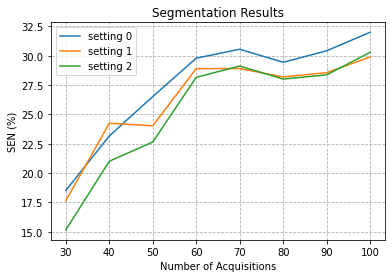

In [ ]:
SEN_setting_0 = [18.52, 23.16, 26.52, 29.79, 30.55, 29.44, 30.42, 32.00]
SEN_setting_1 = [17.64, 24.25, 24.03, 28.90, 28.91, 28.19, 28.56, 29.89]
SEN_setting_2 = [15.16, 21.01, 22.65, 28.16, 29.12, 28.01, 28.37, 30.29]
plt.plot(num_acquisitions, SEN_setting_0, label='setting 0')
plt.plot(num_acquisitions, SEN_setting_1, label='setting 1')
plt.plot(num_acquisitions, SEN_setting_2, label='setting 2')

plt.title('Segmentation Results')
plt.xlabel('Number of Acquisitions')
plt.ylabel('SEN (%)')

plt.grid(linestyle='--')
plt.legend()
plt.show()

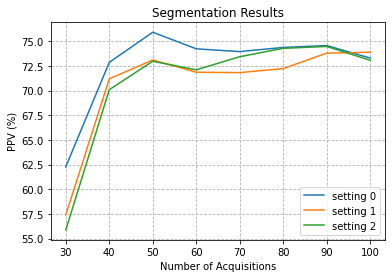

In [ ]:
PPV_setting_0 = [62.28, 72.86, 75.91, 74.23, 73.95, 74.37, 74.56, 73.30]
PPV_setting_1 = [57.40, 71.19, 73.10, 71.86, 71.82, 72.23, 73.79, 73.89]
PPV_setting_2 = [55.88, 70.09, 72.97, 72.10, 73.43, 74.28, 74.47, 73.07]
plt.plot(num_acquisitions, PPV_setting_0, label='setting 0')
plt.plot(num_acquisitions, PPV_setting_1, label='setting 1')
plt.plot(num_acquisitions, PPV_setting_2, label='setting 2')

plt.title('Segmentation Results')
plt.xlabel('Number of Acquisitions')
plt.ylabel('PPV (%)')

plt.grid(linestyle='--')
plt.legend()
plt.show()